## Read Me Section

Created by - Samir Paul

EVA5 - Assignment for "Session 8 - Receptive Fields & Network Architectures"

Dataset = CIFAR10
CNN Model used = ResNet18
Used Pytorth Framework

Target was create the code modular and reach Test Accuracy of 85% with constraint on Epochs.

Work done and Results
---------------------
Created following individual modules for transformations, models, training code and test code and called these modules from main Python Notebook code.
  - mydatatransformation.py
  - mymodels.py
  - mytrain.py
  - mytest.py

Reached Test accuracy of 85% in Epoch 5, after that there slight drop in accuracy, however from Epoch 10 to 13 , Test Accuracy was consistently above 85%

Ran upto 18 Epochs, Test Accuracy at last Epoch is 86%

## Perform standard imports

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
import seaborn as sn  # for heatmaps
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

**Importing my Custom Library - Modular Code**

In [23]:
import mydatatransformation as mytrsfm
import mymodels as mymodel
import mytrain
import mytest


In [24]:
transform = transforms.ToTensor()

train_data = datasets.CIFAR10(root='../Data', train=True, download=True, transform=mytrsfm.transform_train)
test_data = datasets.CIFAR10(root='../Data', train=False, download=True, transform=mytrsfm.transform_test)

Files already downloaded and verified
Files already downloaded and verified


In [25]:
class_names = ['plane', '  car', ' bird', '  cat', ' deer', '  dog', ' frog', 'horse', ' ship', 'truck']

## Lets view few images

Label: [    9     9     4     0     0     2     0     9     3     5     1     8
     5     6     3     5     5     9     6     1     0     5     6     2
     4     7     6     5     4     4     2     2     8     7     4     2
     2     4     4     2     2     1     4     7     5     6     8     5
     8     9     9     7     1     4     6     7     3     4     0     9
     7     8     8     5     2     4     4     3     2     4     5     8
     1     8     9     9     9     8     1     3     9     5     5     1
     9     3     3     9     7     3     5     1     1     2     1     2
     0     9     3     3     6     0     3     2     7     4     3     4
     4     9     2     9     5     8     3     6     1     7     4     6
     6     1     8     8     7     4     3     3]
Class:  truck truck  deer plane plane  bird plane truck   cat   dog   car  ship   dog  frog   cat   dog   dog truck  frog   car plane   dog  frog  bird  deer horse  frog   dog  deer  deer  bird  bird  ship horse  

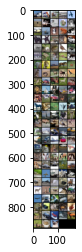

In [26]:
np.set_printoptions(formatter=dict(int=lambda x: f'{x:5}')) 

# Grab the first batch of 10 images
for images,labels in train_loader: 
    break
print('Label:', labels.numpy())
print('Class: ', *np.array([class_names[i] for i in labels]))
im = make_grid(images, nrow=5) 
plt.figure(figsize=(10,4))
plt.imshow(np.transpose(im.numpy(), (1, 2, 0)));

In [27]:
torch.manual_seed(101)
model = mymodel.ResNet18()
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (shortcut): Sequential()
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=

In [28]:
def count_parameters(model):
    params = [p.numel() for p in model.parameters() if p.requires_grad]
    for item in params:
        print(f'{item:>6}')
    print(f'______\n{sum(params):>6}')

In [ ]:
count_parameters(model)

   162
     6
   864
    16
 69120
   120
 10080
    84
   840
    10
______
 81302


In [30]:


!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

model = mymodel.ResNet18().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01,
                      momentum=0.9, weight_decay=5e-4)

In [32]:

EPOCHS = 18
for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    criterion =  nn.CrossEntropyLoss()
    mytrain.train11(model, device, train_loader, optimizer, epoch, criterion)
 
    # scheduler.step()
    mytest.test11(model, device, test_loader)

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH: 0


Loss=0.192209854722023 Batch_id=390 Accuracy=95.11: 100%|██████████| 391/391 [01:08<00:00,  5.71it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8095/10000 (80.95%)

EPOCH: 1


Loss=0.05860743671655655 Batch_id=390 Accuracy=95.73: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8380/10000 (83.80%)

EPOCH: 2


Loss=0.1490217000246048 Batch_id=390 Accuracy=96.34: 100%|██████████| 391/391 [01:07<00:00,  5.83it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8208/10000 (82.08%)

EPOCH: 3


Loss=0.15910939872264862 Batch_id=390 Accuracy=97.01: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8480/10000 (84.80%)

EPOCH: 4


Loss=0.10527943074703217 Batch_id=390 Accuracy=97.28: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8569/10000 (85.69%)

EPOCH: 5


Loss=0.054013751447200775 Batch_id=390 Accuracy=97.37: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8442/10000 (84.42%)

EPOCH: 6


Loss=0.03462878614664078 Batch_id=390 Accuracy=97.80: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8395/10000 (83.95%)

EPOCH: 7


Loss=0.12347917258739471 Batch_id=390 Accuracy=98.36: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8590/10000 (85.90%)

EPOCH: 8


Loss=0.031205540522933006 Batch_id=390 Accuracy=98.18: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8325/10000 (83.25%)

EPOCH: 9


Loss=0.04356306791305542 Batch_id=390 Accuracy=98.41: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8306/10000 (83.06%)

EPOCH: 10


Loss=0.12544119358062744 Batch_id=390 Accuracy=98.56: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8662/10000 (86.62%)

EPOCH: 11


Loss=0.094309002161026 Batch_id=390 Accuracy=98.71: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8546/10000 (85.46%)

EPOCH: 12


Loss=0.03259832412004471 Batch_id=390 Accuracy=98.81: 100%|██████████| 391/391 [01:07<00:00,  5.81it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8618/10000 (86.18%)

EPOCH: 13


Loss=0.1122145801782608 Batch_id=390 Accuracy=98.99: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8642/10000 (86.42%)

EPOCH: 14


Loss=0.0241501796990633 Batch_id=390 Accuracy=98.83: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8476/10000 (84.76%)

EPOCH: 15


Loss=0.043266721069812775 Batch_id=390 Accuracy=98.77: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8543/10000 (85.43%)

EPOCH: 16


Loss=0.05408675596117973 Batch_id=390 Accuracy=99.03: 100%|██████████| 391/391 [01:07<00:00,  5.79it/s]
  0%|          | 0/391 [00:00<?, ?it/s]


Test set:  Accuracy: 8674/10000 (86.74%)

EPOCH: 17


Loss=0.047514818608760834 Batch_id=390 Accuracy=98.98: 100%|██████████| 391/391 [01:07<00:00,  5.80it/s]



Test set:  Accuracy: 8616/10000 (86.16%)

